In [ ]:
#Importing the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Import the dataset from tensor flow
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

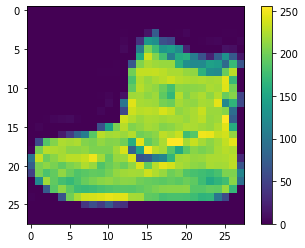

In [ ]:
#Plot at least one sample from each class of the dataset (use matplotlib/seaborn/any other library).
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

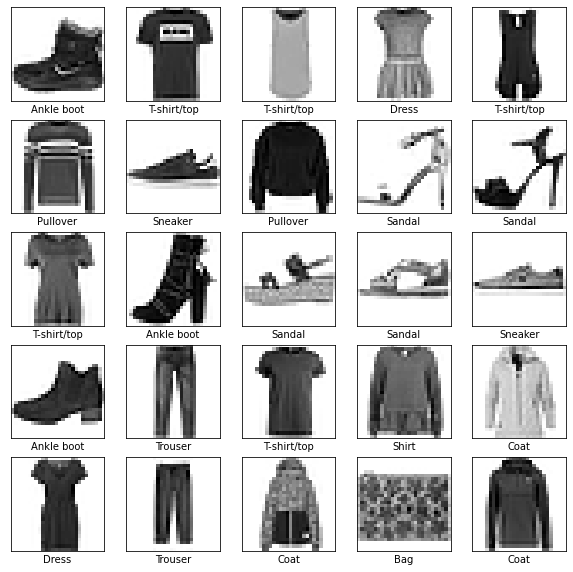

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_full[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [ ]:
#Print the shapes of train and test data.

print("X_train_full.shape:",X_train_full.shape,"\n","X_test.shape:",X_test.shape,"\n","y_train_full.shape:",y_train_full.shape,"\n","y_test.shape:",y_test.shape)


X_train_full.shape: (60000, 28, 28) 
 X_test.shape: (10000, 28, 28) 
 y_train_full.shape: (60000,) 
 y_test.shape: (10000,)


In [ ]:
#Preprocess dataset to normalize values
X_train = tf.keras.utils.normalize(X_train_full, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [ ]:
#Model Building
model = keras.models.Sequential() #Building a sequential model
model.add(keras.layers.Flatten(input_shape=(28, 28))) #Using flatten layer to rshape the tensor. Transform 2D array to 1D
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(300, activation="relu", kernel_regularizer = keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(128, activation="relu",kernel_regularizer = keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 275,318
Trainable params: 275,318
Non-trainable params: 0
_________________________________________________________________


1. Hidden units were selected through after trial and error basis. Found this to produce the optimal output.
2. L2 regularization is added to all layers
3. Dropout is added to the layer before relu activation to filter out unwanted properties. 0.25 value is added to force the output to be zero is the change is 25%
4. Hidden layers use Relu function and Output layer uses softmax as the output is a probability

In [ ]:
#Model Compilation
model.compile(loss="sparse_categorical_crossentropy",
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

Loss: sparse_categorical_crossentropy - as there are ten label classes.
Optimizer: Adam - As this is a more efficient than SGD and LR = 0.001 as this is a recommended choice for imagenet based problems

In [ ]:
import time
start_time = time.time()
model_1 = model.fit(X_train, y_train_full, epochs=25, validation_split = 0.25, batch_size = 150, shuffle = True, verbose = 2)
end_time = time.time()

Epoch 1/25
300/300 - 1s - loss: 0.6771 - accuracy: 0.7789 - val_loss: 0.4990 - val_accuracy: 0.8435
Epoch 2/25
300/300 - 1s - loss: 0.5018 - accuracy: 0.8381 - val_loss: 0.4596 - val_accuracy: 0.8516
Epoch 3/25
300/300 - 1s - loss: 0.4669 - accuracy: 0.8491 - val_loss: 0.4383 - val_accuracy: 0.8615
Epoch 4/25
300/300 - 1s - loss: 0.4447 - accuracy: 0.8566 - val_loss: 0.4181 - val_accuracy: 0.8701
Epoch 5/25
300/300 - 1s - loss: 0.4259 - accuracy: 0.8638 - val_loss: 0.4075 - val_accuracy: 0.8711
Epoch 6/25
300/300 - 1s - loss: 0.4126 - accuracy: 0.8684 - val_loss: 0.3969 - val_accuracy: 0.8773
Epoch 7/25
300/300 - 1s - loss: 0.4050 - accuracy: 0.8714 - val_loss: 0.3893 - val_accuracy: 0.8774
Epoch 8/25
300/300 - 1s - loss: 0.3968 - accuracy: 0.8738 - val_loss: 0.4041 - val_accuracy: 0.8733
Epoch 9/25
300/300 - 1s - loss: 0.3928 - accuracy: 0.8754 - val_loss: 0.4110 - val_accuracy: 0.8726
Epoch 10/25
300/300 - 1s - loss: 0.3786 - accuracy: 0.8814 - val_loss: 0.3847 - val_accuracy: 0.8794

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3930 - accuracy: 0.8812
Test Accuracy 0.8812000155448914


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

array([0.08539363, 0.08539359, 0.0853936 , 0.08539362, 0.08539361,
       0.08542137, 0.08539362, 0.08575589, 0.08539367, 0.23106742],
      dtype=float32)

In [ ]:
class_names[np.argmax(predictions[0])]


'Ankle boot'

In [ ]:
class_names[y_test[0]]

'Ankle boot'

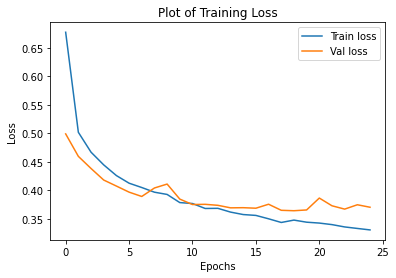

In [ ]:
# plot the training loss

plt.plot(model_1.history['loss'], label='Train loss')
plt.plot(model_1.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

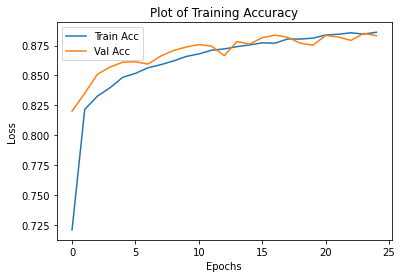

In [ ]:
# plot the training accuracy

plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

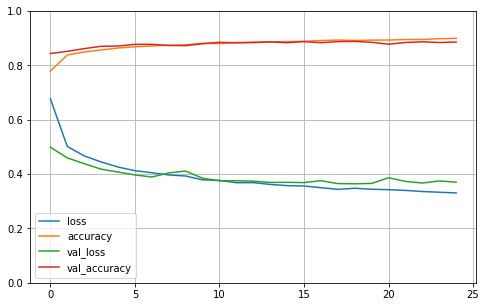

time_taken: 27.445780992507935 seconds


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
time_taken =  end_time - start_time
print("time_taken:", time_taken, "seconds")




In [ ]:
img = X_test[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true= y_test, y_pred=predictions)

In [ ]:
#Plotting the confusion matrix by defining the plot_confusion_matrix function
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[793   1  14  17   2   1 160   0  12   0]
 [  2 967   3  16   3   0   8   0   1   0]
 [ 11   0 813   7  88   0  77   0   4   0]
 [ 17   2  12 892  38   0  31   0   7   1]
 [  1   0 112  27 771   0  86   0   3   0]
 [  0   0   0   0   0 947   0  30   2  21]
 [ 90   0  90  21  54   0 728   0  17   0]
 [  0   0   0   0   0   6   0 956   0  38]
 [  0   0   2   2   3   2   6   3 982   0]
 [  0   0   0   0   0   2   0  34   1 963]]


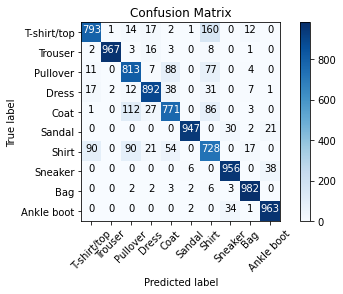

In [ ]:
#Confusion Matrix
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix')

In [ ]:
print(classification_report(y_true= y_test, y_pred=predictions, target_names=class_names,))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.79      0.83      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.78      0.81      0.79      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.80      0.77      0.79      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.66      0.73      0.69      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



1. The best performing class would be Ankle Boot. This might be because the ankle boot is an accessory and has a unique shape. However it has been misclassfied several times as the sneaker.
2. The worst perorming would be Shirt. A lot of items from the Shirt class has been misclassified as the Tshirt.
3. The overall trend is that the model is able to differentiate between the objects but fails in performance when it comes to similart looking objects. The precision between shirt, coat and pullover. These are similar looking objects and hence high chances of being misclassified.

## Hyper Parameter Tuning

# 1. Modifying the hidden units and layers. The number of hidden layers is 3 and the units for each layer is kept as a baseline model.

In [ ]:
#Model Building
model1 = keras.models.Sequential() #Building a sequential model
model1.add(keras.layers.Flatten(input_shape=(28, 28))) #Using flatten layer to rshape the tensor. Transform 2D array to 1D
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Dense(60, activation="relu", kernel_regularizer = keras.regularizers.l2(0.0001)))
model1.add(keras.layers.Dense(60, activation="relu", kernel_regularizer = keras.regularizers.l2(0.0001)))
model1.add(keras.layers.Dense(30, activation="relu",kernel_regularizer = keras.regularizers.l2(0.0001)))
model1.add(keras.layers.Dense(10, activation="softmax"))
              

In [ ]:
#Model Compilation
model1.compile(loss="sparse_categorical_crossentropy",
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

In [ ]:
h = model1.fit(X_train, y_train_full, epochs=25, validation_split = 0.25, batch_size = 150, shuffle = True, verbose = 2)


Epoch 1/25
300/300 - 1s - loss: 0.8026 - accuracy: 0.7196 - val_loss: 0.5287 - val_accuracy: 0.8103
Epoch 2/25
300/300 - 1s - loss: 0.5256 - accuracy: 0.8152 - val_loss: 0.4746 - val_accuracy: 0.8367
Epoch 3/25
300/300 - 1s - loss: 0.4848 - accuracy: 0.8311 - val_loss: 0.4424 - val_accuracy: 0.8503
Epoch 4/25
300/300 - 1s - loss: 0.4564 - accuracy: 0.8432 - val_loss: 0.4320 - val_accuracy: 0.8500
Epoch 5/25
300/300 - 1s - loss: 0.4395 - accuracy: 0.8490 - val_loss: 0.4174 - val_accuracy: 0.8570
Epoch 6/25
300/300 - 1s - loss: 0.4293 - accuracy: 0.8534 - val_loss: 0.3987 - val_accuracy: 0.8657
Epoch 7/25
300/300 - 1s - loss: 0.4170 - accuracy: 0.8580 - val_loss: 0.3903 - val_accuracy: 0.8671
Epoch 8/25
300/300 - 1s - loss: 0.4091 - accuracy: 0.8604 - val_loss: 0.3951 - val_accuracy: 0.8703
Epoch 9/25
300/300 - 1s - loss: 0.4008 - accuracy: 0.8644 - val_loss: 0.4055 - val_accuracy: 0.8638
Epoch 10/25
300/300 - 1s - loss: 0.3962 - accuracy: 0.8651 - val_loss: 0.3931 - val_accuracy: 0.8678

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8742
Test Accuracy 0.8741999864578247


# 2. Regularization: Train a model without regularization

In [ ]:
model2 = keras.models.Sequential() #Building a sequential model
model2.add(keras.layers.Flatten(input_shape=(28, 28))) #Using flatten layer to rshape the tensor. Transform 2D array to 1D
model2.add(keras.layers.Dropout(0.25))
model2.add(keras.layers.Dense(60, activation="relu"))
model2.add(keras.layers.Dense(60, activation="relu"))
model2.add(keras.layers.Dense(30, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))
              

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
start_time = time.time()
h = model2.fit(X_train, y_train_full, epochs=25, validation_split = 0.25, batch_size = 150, shuffle = True, verbose = 2)
end_time = time.time()

Epoch 1/25
300/300 - 1s - loss: 0.7703 - accuracy: 0.7208 - val_loss: 0.4866 - val_accuracy: 0.8201
Epoch 2/25
300/300 - 1s - loss: 0.4902 - accuracy: 0.8215 - val_loss: 0.4414 - val_accuracy: 0.8350
Epoch 3/25
300/300 - 1s - loss: 0.4531 - accuracy: 0.8326 - val_loss: 0.4136 - val_accuracy: 0.8509
Epoch 4/25
300/300 - 1s - loss: 0.4321 - accuracy: 0.8397 - val_loss: 0.3873 - val_accuracy: 0.8570
Epoch 5/25
300/300 - 1s - loss: 0.4107 - accuracy: 0.8484 - val_loss: 0.3773 - val_accuracy: 0.8611
Epoch 6/25
300/300 - 1s - loss: 0.3991 - accuracy: 0.8517 - val_loss: 0.3739 - val_accuracy: 0.8614
Epoch 7/25
300/300 - 1s - loss: 0.3860 - accuracy: 0.8564 - val_loss: 0.3766 - val_accuracy: 0.8595
Epoch 8/25
300/300 - 1s - loss: 0.3783 - accuracy: 0.8590 - val_loss: 0.3557 - val_accuracy: 0.8662
Epoch 9/25
300/300 - 1s - loss: 0.3693 - accuracy: 0.8621 - val_loss: 0.3492 - val_accuracy: 0.8708
Epoch 10/25
300/300 - 1s - loss: 0.3601 - accuracy: 0.8658 - val_loss: 0.3444 - val_accuracy: 0.8737

In [ ]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print("Test Accuracy", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8763
Test Accuracy 0.8762999773025513


In [ ]:
print('Testing loss \t', test_loss)
print('Testing accuracy ', test_acc)

Testing loss 	 0.33510076999664307
Testing accuracy  0.8762999773025513
